Category distribution:
category
Normal                                                                                                             11730
Depression                                                                                                          6697
Suicidal                                                                                                            3611
Anxiety                                                                                                             1084
Bipolar                                                                                                              657
                                                                                                                   ...  
 trying to fully understand me.                                                                                        1
 honestly.                                                                                                             1


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-3-48522c03d875>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='viridis')


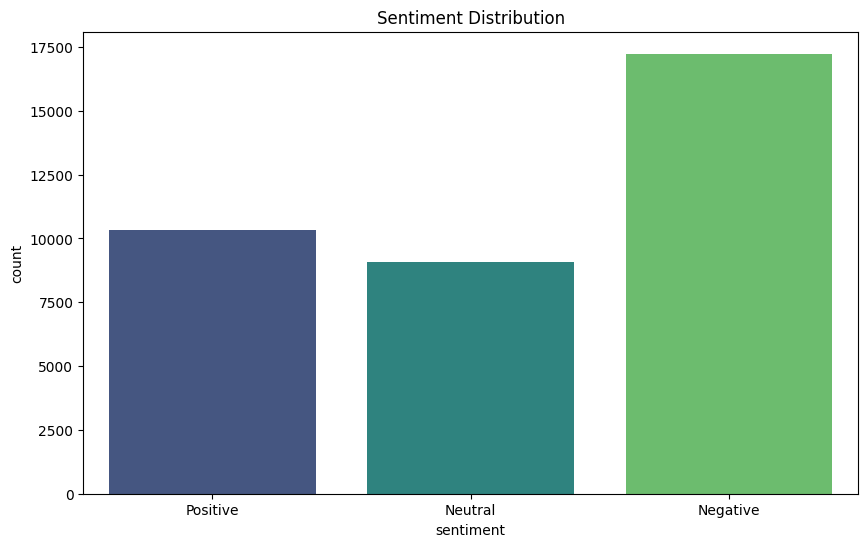

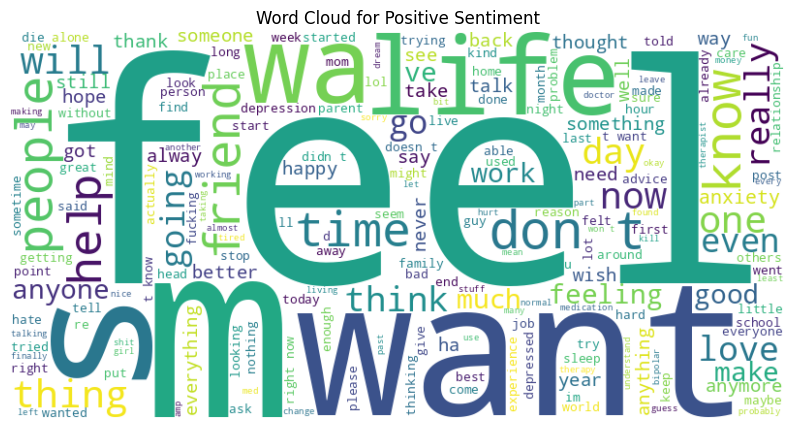

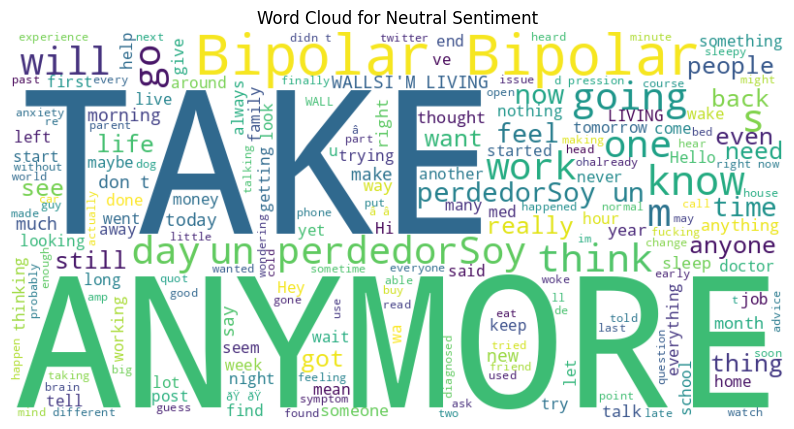

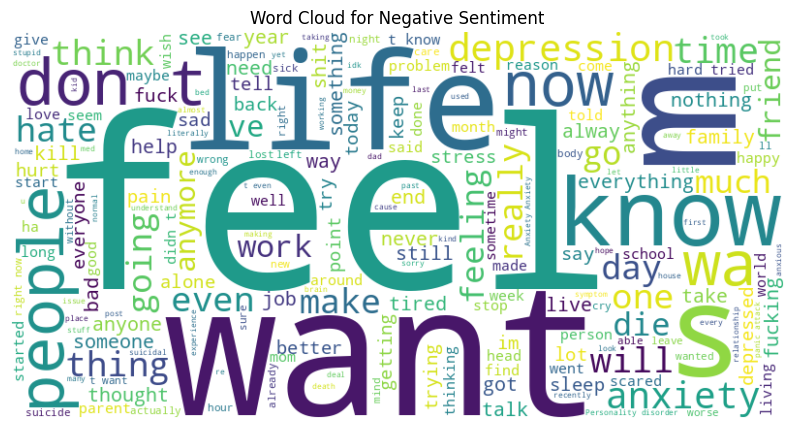

Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.85      0.72      3403
     Neutral       0.65      0.39      0.49      1803
    Positive       0.74      0.56      0.64      2122

    accuracy                           0.65      7328
   macro avg       0.67      0.60      0.62      7328
weighted avg       0.67      0.65      0.64      7328

Confusion Matrix:
[[2897  190  316]
 [ 997  709   97]
 [ 747  188 1187]]
Accuracy Score:
0.6540665938864629


In [ ]:
# Sentiment Analysis on Mental Health Forums

# Step 1: Install Required Libraries
!pip install pandas matplotlib seaborn nltk transformers scikit-learn textblob

# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from textblob import TextBlob

# Step 3: Load Dataset
data_url = '/content/Combined Data.csv'
df = pd.read_csv(data_url, on_bad_lines='skip', quoting=3, encoding='utf-8', engine='python')

# Step 4: Data Preprocessing
df = df[['statement', 'status']]  # Use correct column names
df.rename(columns={'statement': 'text', 'status': 'category'}, inplace=True)  # Rename for consistency
df.dropna(subset=['text'], inplace=True)  # Drop rows with missing 'text'

# Display Categories
print("Category distribution:")
print(df['category'].value_counts())

# Step 5: Sentiment Analysis Using NLTK
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply Sentiment Analysis
df['sentiment'] = df['text'].apply(get_sentiment)

# Step 6: Visualize Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

# Step 7: Word Cloud for Each Sentiment
for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(df[df['sentiment'] == sentiment]['text'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

# # Step 8.1: Advanced Sentiment Analysis Using Hugging Face
# # Load a simpler Hugging Face model for sentiment analysis
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
# model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# def advanced_sentiment_hf(text):
#     inputs = tokenizer(text[:250], return_tensors="pt", truncation=True, max_length=250)
#     outputs = model(**inputs)
#     logits = outputs.logits
#     sentiment = logits.argmax().item()
#     return "Positive" if sentiment == 1 else "Negative"

# # Apply Hugging Face method
# df['advanced_sentiment_hf'] = df['text'].apply(advanced_sentiment_hf)

# Step 8: Advanced Sentiment Analysis Using TextBlob
def advanced_sentiment_tb(text):
    analysis = TextBlob(text[:250])  # Limit to 250 characters
    polarity = analysis.sentiment.polarity
    return "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"

# Apply TextBlob method
df['advanced_sentiment_tb'] = df['text'].apply(advanced_sentiment_tb)

# Step 9: Save Results
df.to_csv('sentiment_analysis_results.csv', index=False)

# Step 10: Classification
# Convert text data to feature vectors
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['text']).toarray()

y = df['sentiment']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make Predictions
y_pred = classifier.predict(X_test)

# Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
